# Tabular Q-learning for Taxi-v3

*Enrique Favila Martínez, 2025*

Tabular Q-learning is a foundational reinforcement learning algorithm that learns the value of taking particular actions in specific states through direct experience and trial-and-error. In the Taxi-v3 environment, the agent’s objective is to pick up a passenger at one location and drop them off at another, while navigating a discrete grid world with a finite number of possible states and actions.

Because Taxi-v3 has a small and fully discrete state-action space, tabular Q-learning is both efficient and highly effective. The agent maintains a Q-table, where each entry represents the estimated expected reward for a state-action pair. As the agent explores the environment and receives feedback, it updates the Q-table using the Q-learning update rule, gradually learning an optimal policy. This setting provides a clear demonstration of how classical reinforcement learning techniques can solve decision-making problems when the state space is manageable.


## Required Packages and Imports

Before running the code, make sure the necessary packages are installed.  
The following commands will install the required libraries:


In [7]:
%pip install --quiet --upgrade gymnasium
%pip install --quiet pygame

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


## Necessary imports
Import the essential libraries for building and training your reinforcement learning agent.


In [4]:
import gymnasium as gym
import numpy as np
import random
from tqdm import trange

env = gym.make("Taxi-v3", render_mode="rgb_array")


## Hyperparameter Configuration and Q-table Initialization

Set up a configuration class to store the hyperparameters for tabular Q-learning.  
These parameters control the learning rate, discount factor, exploration schedule, and number of training episodes


In [1]:

class Config:
    alpha: float = 0.1     # learning rate
    gamma: float = 0.99    # discount factor
    epsilon: float  = 1.0   # initial exploration rate
    epsilon_min: float = 0.05   # minimum exploration rate
    epsilon_decay: float = 0.995    # exploration rate decay factor
    n_episodes: int = 5000  # number of episodes to train

# Q-table: 500 states x 6 actions
Q = np.zeros((env.observation_space.n, env.action_space.n))

def create_seed():
    np.random.seed(42)
    random.seed(42)
    env.reset(seed=42)


NameError: name 'np' is not defined

## Training Loop

The `train` function implements the main tabular Q-learning algorithm. It runs for a specified number of episodes and updates the Q-table based on the agent’s experiences.

- **Epsilon-greedy strategy:**  
  At each step, the agent chooses a random action with probability `epsilon` (exploration), or the best known action according to the Q-table (exploitation).
- **Q-table update:**  
  After each action, the agent receives a reward and updates the Q-value for the state–action pair using the Q-learning update rule.
- **Epsilon decay:**  
  After each episode, the exploration rate is decayed, gradually shifting the agent from exploration to exploitation.
- **Progress tracking:**  
  The `tqdm` progress bar shows training progress, and at the end, the average reward over the last 100 episodes is reported.


In [ ]:
from tqdm import trange

def train(cfg):
    rewards = []
    epsilon = cfg.epsilon

    for episode in trange(cfg.n_episodes):
        state, _ = env.reset()
        done = False
        total_reward = 0

        while not done:
            if np.random.rand() < epsilon:
                action = env.action_space.sample()
            else:
                action = np.argmax(Q[state])
            next_state, reward, terminated, truncated, info = env.step(action)
            done = terminated or truncated
            Q[state, action] += cfg.alpha * (reward + cfg.gamma * np.max(Q[next_state]) - Q[state, action])
            state = next_state
            total_reward += reward

        rewards.append(total_reward)
        epsilon = max(cfg.epsilon_min, epsilon * cfg.epsilon_decay)

        # Print rolling average every 100 episodes
        #if (episode+1) % 100 == 0:
            #avg_reward = np.mean(rewards[-100:])
            #print(f"Episode {episode+1}, Average reward (last 100): {avg_reward:.2f}, Epsilon: {epsilon:.2f}")

    env.close()
    avg_reward = np.mean(rewards[-100:])
    avg_reward = np.mean(rewards[-100:])
    print(f"Training complete. Average reward (last 100): {avg_reward:.2f}, Epsilon: {epsilon:.2f}")
    
    return rewards

### Start training
Generate the seed (Necessary for reproducibility) and start the training process.

In [ ]:

cfg = Config()
create_seed()
rewards = train(cfg)


100%|██████████| 5000/5000 [00:01<00:00, 3661.06it/s]

Training complete. Average reward (last 100): 6.20, Epsilon: 0.05


## Results: Taxi-v3 Q-learning Reward Curve

The graph above shows the reward received by the agent in each episode during training with tabular Q-learning on the Taxi-v3 environment.

### How is this graph generated?

After training, the list of total rewards per episode (returned by the `train` function) is plotted against the episode number using `matplotlib`. Each point on the plot represents the total reward the agent received in that episode.


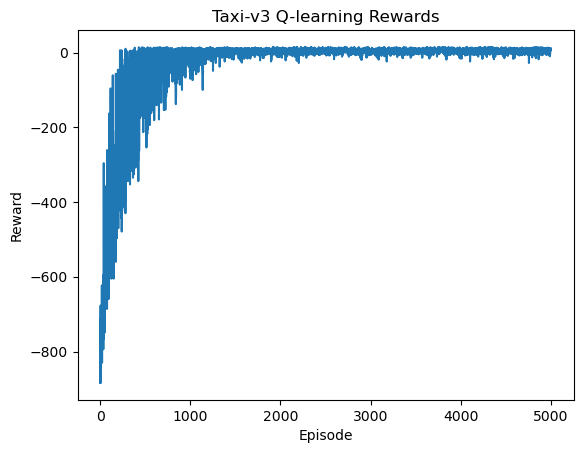

In [8]:
import matplotlib.pyplot as plt

plt.plot(rewards)
plt.xlabel('Episode')
plt.ylabel('Reward')
plt.title('Taxi-v3 Q-learning Rewards')
plt.show()

### Testing the trained Q-learning model using pygame

Now we'll evaluate the performance of our trained agent by running it in the Taxi-v3 environment with pygame rendering.

 **Warning: Rendered Window May Not Close Automatically**

 When using `render_mode="human"` with Gym/Gymnasium environments (like Taxi-v3 or LunarLander), the graphical window that opens to show the environment may not close on its own after your script finishes—especially when running inside Jupyter notebooks or on macOS.

 This is due to how the rendering backend handles window events. The window can become unresponsive if the Python process is still running or if it was opened from a notebook.

 **How to close the window:**
 - Force exit.
 - If running from a standalone script, try closing the window normally (using the close button).
 - If that fails, or if you’re in a notebook and the window is frozen, you can force-close it by killing the Python process:

 ```bash
 ps aux | grep python
 kill <PID>
 ```
 Replace `<PID>` with the process ID you find in the output.

 If you’re unsure, you can always close your terminal or restart your kernel to clean up any stuck processes.

In [ ]:

import time
env = gym.make("Taxi-v3", render_mode="human")  

num_episodes = 10

for ep in range(num_episodes):
    state, _ = env.reset()
    done = False
    total_reward = 0

    env.render()
    time.sleep(1)  # Pause before starting

    while not done:
        action = np.argmax(Q[state])  # Use the learned policy
        next_state, reward, terminated, truncated, info = env.step(action)
        done = terminated or truncated
        env.render()
        time.sleep(0.1)  # Slow down so you can watch
        state = next_state
        total_reward += reward

    print(f"Episode {ep+1} finished with reward {total_reward}")

time.sleep(2)  # Pause before closing
env.close()

Episode 1 finished with reward 12
Episode 2 finished with reward 4
Episode 3 finished with reward 4
Episode 4 finished with reward 4
Episode 5 finished with reward 8


: 

### Conclusion: Tabular Q-learning with Taxi-v3

The **Taxi-v3** environment is an ideal playground for tabular Q-learning. Because the state and action spaces are fully discrete and manageable in size, the agent can efficiently learn optimal behavior by directly updating and referencing the Q-table. 

This approach highlights the strengths of *classic reinforcement learning*: simple algorithms, interpretable results, and reliable convergence when the problem space is small and well-structured. Through this project, we see that tabular Q-learning remains a practical and effective solution for problems where all possible states and actions can be **explicitly** represented.